<a class="anchor" id="0"></a>
# **Time Series Modeling**


In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})


## **Import data**

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/univariate/acea-water-prediction/River_Arno.csv")
df.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [18]:
df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8217 non-null   datetime64[ns]
 1   Rainfall_Le_Croci          6026 non-null   float64       
 2   Rainfall_Cavallina         6026 non-null   float64       
 3   Rainfall_S_Agata           6026 non-null   float64       
 4   Rainfall_Mangona           6026 non-null   float64       
 5   Rainfall_S_Piero           6026 non-null   float64       
 6   Rainfall_Vernio            4283 non-null   float64       
 7   Rainfall_Stia              1283 non-null   float64       
 8   Rainfall_Consuma           1283 non-null   float64       
 9   Rainfall_Incisa            4568 non-null   float64       
 10  Rainfall_Montevarchi       1647 non-null   float64       
 11  Rainfall_S_Savino          1283 non-null   float64       
 12  Rainfa

In [19]:
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month

In [20]:
def get_df():
    df = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/univariate/acea-water-prediction/River_Arno.csv")
    df.head()
    # df.columns = ['date','#passengers']
    df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')
    df['day'] = df['Date'].dt.day
    df['year'] = df.Date.dt.year
    df['month'] = df.Date.dt.month
    return df

df = get_df()
df.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano,day,year,month
0,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82,1,1998,1
1,1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94,2,1998,1
2,1998-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11,3,1998,1
3,1998-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84,4,1998,1
4,1998-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88,5,1998,1


## **Visualize the Time Series**

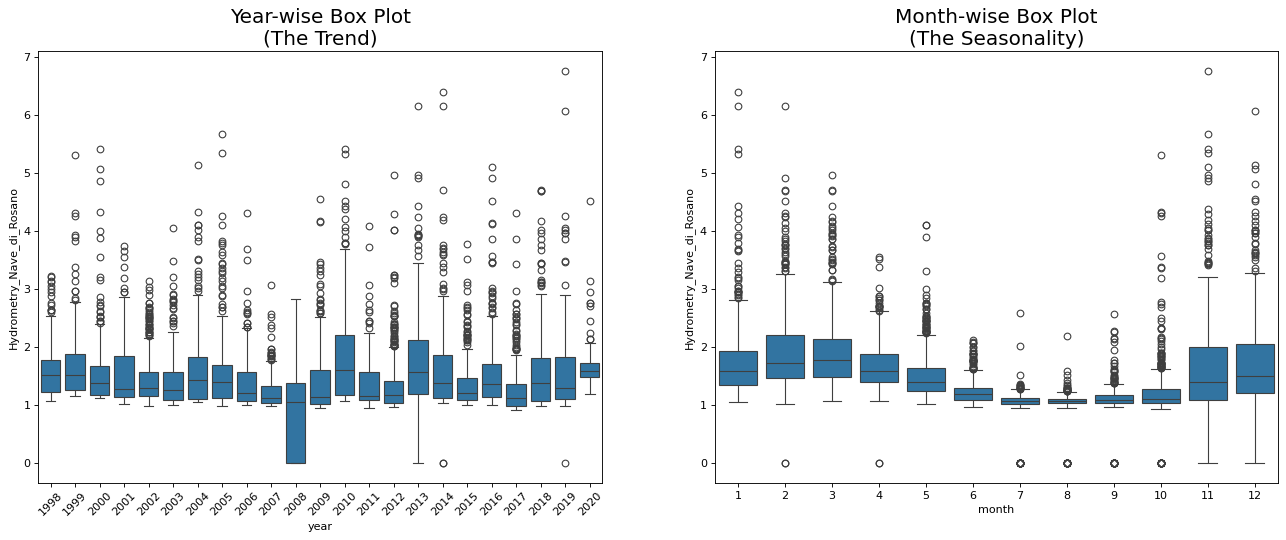

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Hydrometry_Nave_di_Rosano', data=df, ax=axes[0])
sns.boxplot(x='month', y='Hydrometry_Nave_di_Rosano', data=df.loc[~df.year.isin([1998, 2020]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[0].tick_params(axis='x', labelrotation = 45)
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
#plt.xticks(rotation = 90)
plt.show()

/var/folders/7g/b6bnf9xj6hsdfj6hqx3tgqr00000gn/T/ipykernel_80336/3284811806.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hydrometry_Nave_di_Rosano'].replace(0, np.nan, inplace=True)


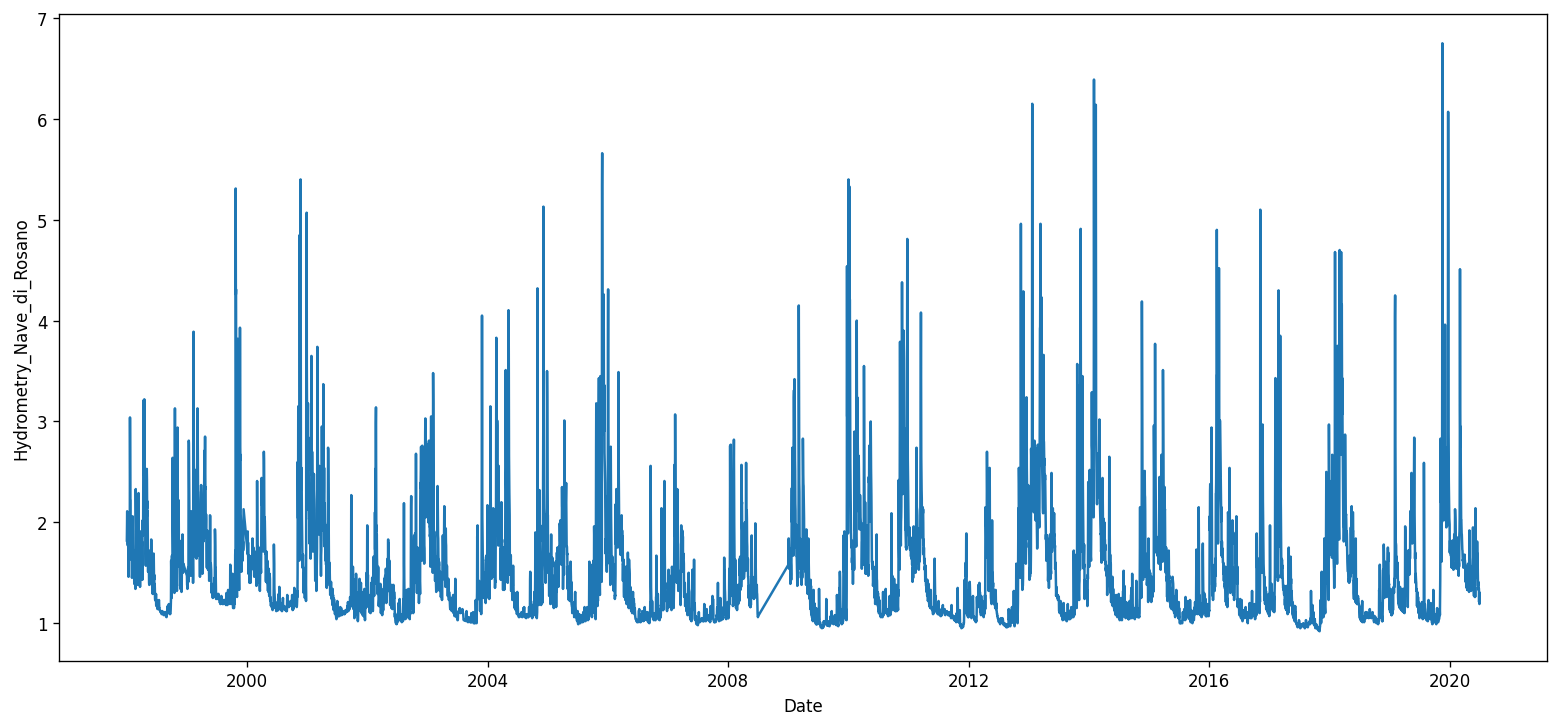

In [22]:
fig = plt.subplots(figsize=(16,7))
df['Hydrometry_Nave_di_Rosano'].replace(0, np.nan, inplace=True)
sns.lineplot(x='Date',y='Hydrometry_Nave_di_Rosano',data=df)
#fig.update_xaxes(rangeslider_visible=True)
plt.show()

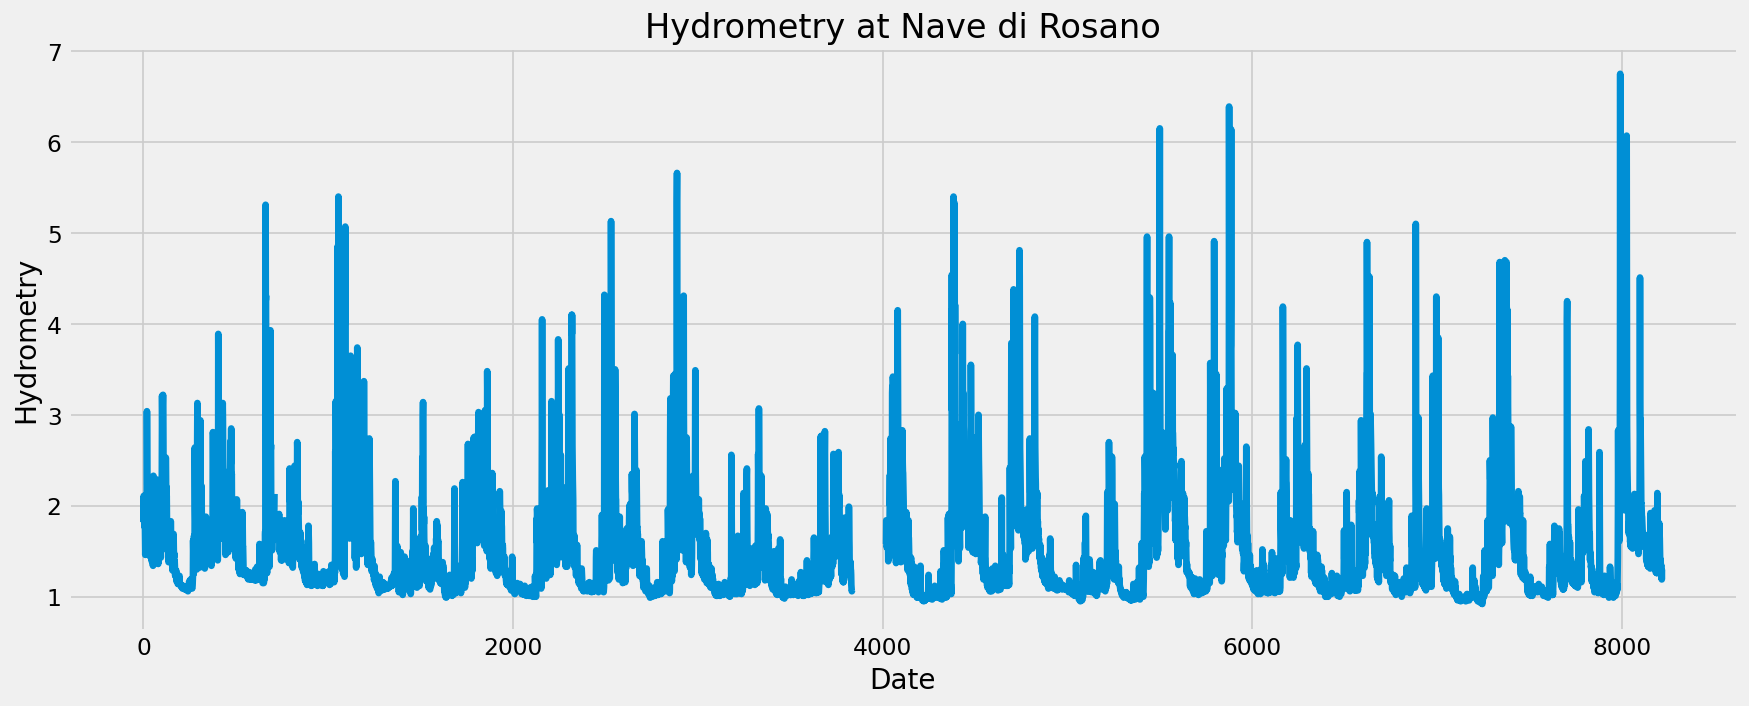

In [24]:
plt.figure(figsize=(16, 6))
plt.plot(df['Hydrometry_Nave_di_Rosano'])
plt.xlabel('Date')
plt.ylabel('Hydrometry')
plt.title('Hydrometry at Nave di Rosano')
plt.show()

# Modelling using statstools

In [25]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from sklearn.metrics import mean_squared_error

In [26]:
df = get_df()
timeseries = df['Hydrometry_Nave_di_Rosano']
timeseries = timeseries.fillna(timeseries.mean())

timeseries = timeseries.replace([np.inf, -np.inf], np.nan)
timeseries = timeseries.fillna(timeseries.max())

## AR (Autogressive) model

- Mô hình tự hồi quy xác định rằng biến đầu ra phụ thuộc tuyến tính vào giá trị trước đó của nó và một thuật ngữ ngẫu nhiên (một thuật ngữ khó dự đoán); do đó mô hình có dạng một phương trình chênh lệch ngẫu nhiên (hoặc mối quan hệ lặp định không nên nhầm lẫn với phương trình vi phân).







In [27]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA

In [28]:
min_aic = np.inf
best_ar_order = None
for p in range(1, 6):  # Quét các giá trị p từ 1 đến 5
    ar_model = AutoReg(timeseries, lags=p).fit()
    aic = ar_model.aic
    if aic < min_aic:
        min_aic = aic
        best_ar_order = p

In [29]:
best_ar_model = AutoReg(timeseries, lags=best_ar_order).fit()
print(f"Mô hình AR tốt nhất có bậc p={best_ar_order} và AIC={min_aic:.2f}")
print('AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'.format(best_ar_model.aic, best_ar_model.hqic, best_ar_model.bic))
print(best_ar_model.summary())

Mô hình AR tốt nhất có bậc p=5 và AIC=2247.61
AIC: 2247.613, HQIC: 2264.395, BIC: 2296.706
                                AutoReg Model Results                                
Dep. Variable:     Hydrometry_Nave_di_Rosano   No. Observations:                 8217
Model:                            AutoReg(5)   Log Likelihood               -1116.806
Method:                      Conditional MLE   S.D. of innovations              0.277
Date:                       Sat, 08 Jun 2024   AIC                           2247.613
Time:                               14:49:31   BIC                           2296.706
Sample:                                    5   HQIC                          2264.395
                                        8217                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                      

In [30]:
from statsmodels.tsa.ar_model import AutoReg

# Splitting into training and testing sets
train_size = int(len(timeseries) * 0.8)
train, test = timeseries[:train_size], timeseries[train_size:]

In [31]:
# Fit the AutoReg model on the training data
model = AutoReg(train, lags=5)      # lags = (1, 2, 3, 4, 5)
model_01 = model.fit()             # get the fitted model.

# Print the model summary
print(model_01.summary())
print('AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'.format(model_01.aic, model_01.hqic, model_01.bic))

                                AutoReg Model Results                                
Dep. Variable:     Hydrometry_Nave_di_Rosano   No. Observations:                 6573
Model:                            AutoReg(5)   Log Likelihood                -762.254
Method:                      Conditional MLE   S.D. of innovations              0.272
Date:                       Sat, 08 Jun 2024   AIC                           1538.508
Time:                               14:49:36   BIC                           1586.037
Sample:                                    5   HQIC                          1554.938
                                        6573                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1189      0.009     12.695      0.000       0.101       0.137
Hydrometry_Nave_di_Ro

In [34]:
from permetrics import RegressionMetric

# Making predictions
y_pred = best_ar_model.predict(start=len(train), end=len(timeseries)-1, dynamic=False)

# Convert test and y_pred to numpy arrays
test_np = test.to_numpy()
y_pred_np = y_pred.to_numpy()

# Calculate performance metrics
from permetrics import RegressionMetric

evaluator = RegressionMetric(test_np, y_pred_np)
print(evaluator.get_metrics_by_list_names(["RMSE", "MAE", "MAPE", "R2", "NSE", "KGE"]))

{'RMSE': 0.29780515514459066, 'MAE': 0.13600605112560535, 'MAPE': 1.0, 'R2': 0.7578241263397547, 'NSE': 0.7578241263397547, 'KGE': 0.8307264953978926}


In [35]:
## Draw the results

def draw_true_pred(y_true, y_pred):
    # plot results
    plt.plot(y_true)
    plt.plot(y_pred, color='red')
    plt.show()

def draw_auto_regression_result(data_length, train, test, y_pred):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(train, label='Train', color="green")
    plt.plot(np.arange(train_size, data_length), test, label='Test')
    plt.plot(np.arange(train_size, data_length), y_pred, label='Predictions', color='red')
    plt.legend()
    plt.title('AutoReg Model Predictions')
    plt.show()


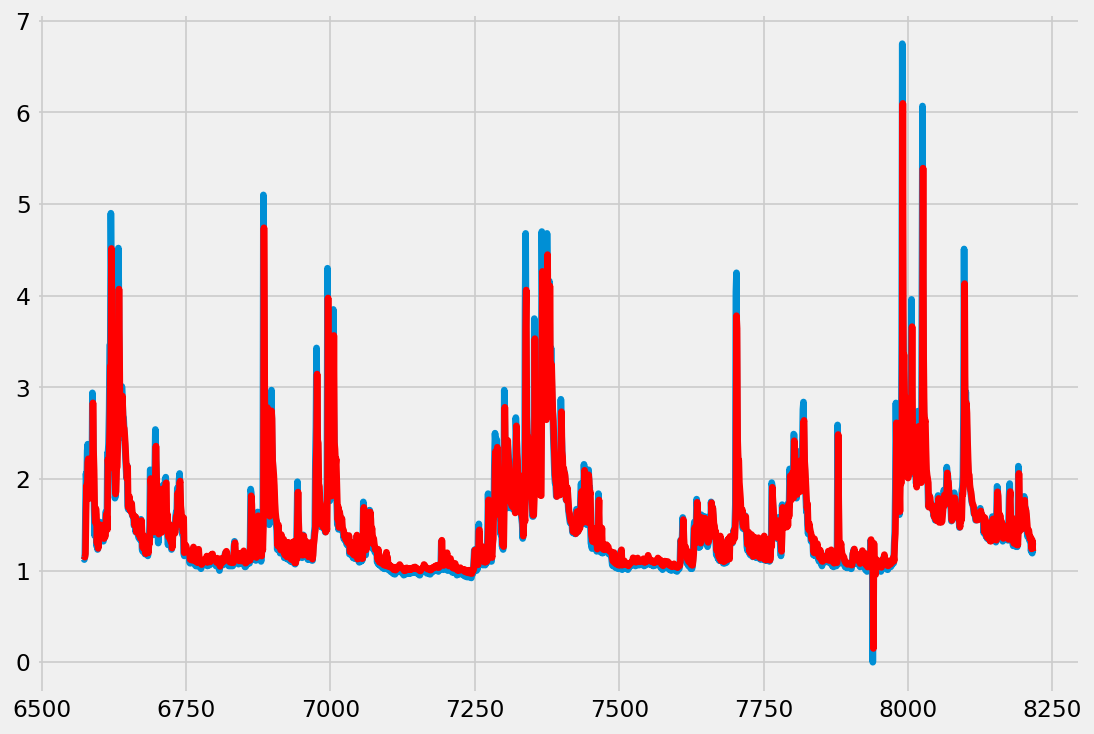

In [36]:
## Draw true and pred
draw_true_pred(test, y_pred)

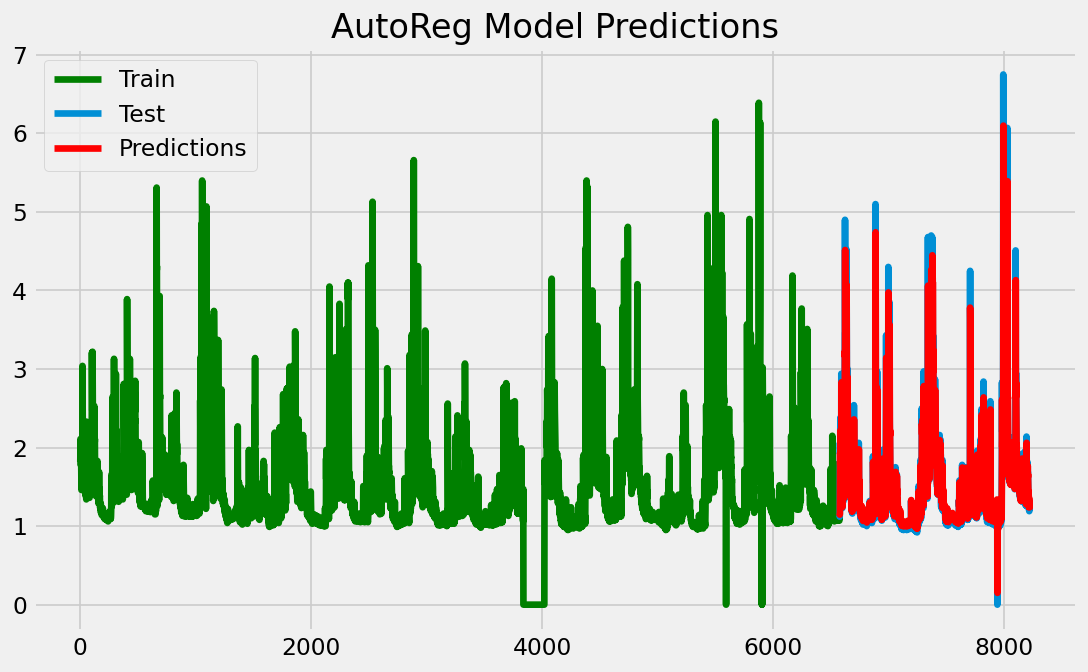

In [37]:
## Draw train, true, and pred
draw_auto_regression_result(len(timeseries), train, test, y_pred)

Coefficients: [ 2.06036433e-05 -9.45440008e-01 -1.03337146e+00 -1.02919636e+00
 -1.01806275e+00 -9.41801669e-01 -8.61686174e-01 -7.46382609e-01
 -6.55299569e-01 -5.23203219e-01 -3.90574618e-01 -2.53873193e-01
 -1.53147439e-01]
predicted=0.114855, expected=0.040000
predicted=0.013780, expected=0.090000
predicted=-0.033033, expected=-0.070000
predicted=-0.009147, expected=-0.020000
predicted=0.001094, expected=0.070000
predicted=0.006181, expected=-0.030000
predicted=-0.004043, expected=-0.120000
predicted=-0.005241, expected=0.220000
predicted=-0.042683, expected=-0.200000
predicted=0.019919, expected=0.220000
Test RMSE: 0.122


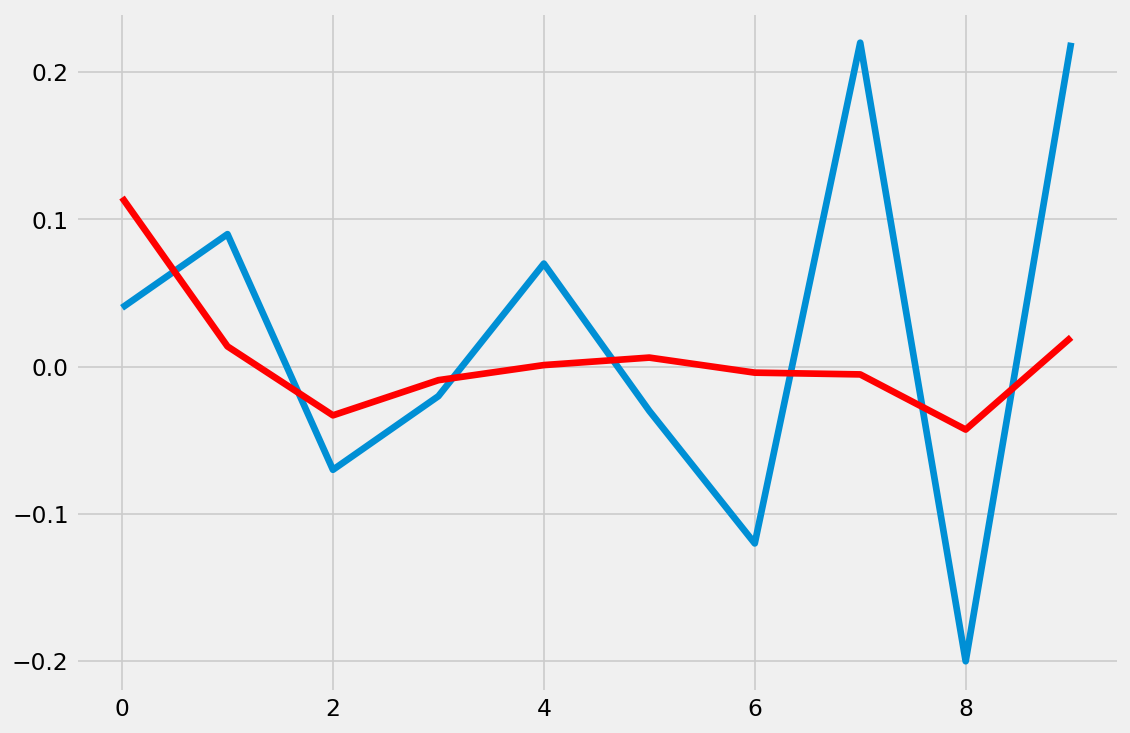

In [38]:
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['Hydrometry_Nave_di_Rosano'].fillna(df['Hydrometry_Nave_di_Rosano'].mean()))
df['Hydrometry_Nave_di_Rosano'] = np.append([0], ts_diff)
df['Hydrometry_Nave_di_Rosano_diff1'] = df['Hydrometry_Nave_di_Rosano'].diff(1).fillna(df['Hydrometry_Nave_di_Rosano'].mean())
dataset = df['Hydrometry_Nave_di_Rosano_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# train autoregression
model = AutoReg(train, lags=12)		# lags = (1, 2, 3, ..., 12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Moving Average (Trung bình di động)

- Trong phân tích chuỗi thời gian, mô hình trung bình di động (MA), còn được gọi là quá trình trung bình di động, là một phương pháp phổ biến để mô hình chuỗi thời gian một biến. Mô hình trung bình di động chỉ ra rằng biến đầu ra phụ thuộc tuyến tính vào giá trị hiện tại và các giá trị quá khứ của một thuật ngữ ngẫu nhiên (không thể dự đoán hoàn toàn).

- Cùng với mô hình tự hồi quy (AR), mô hình trung bình di động là một trường hợp đặc biệt và thành phần chính của các mô hình ARMA và ARIMA phức tạp hơn về cấu trúc ngẫu nhiên.



In [39]:
u = 3
p = -0.6
T = 500
mean = u
w = np.random.normal(loc=0, scale=1, size=500)
data = np.zeros(500)
data[0] = 3 + w[0]
for i in range(1,500):
    data[i] = 3 + w[i] - 0.6*w[i-1]

Coefficients: [-2.44504950e-05 -1.05860359e+00 -2.18046282e-01  1.51947259e-01
  1.77869428e-02  5.74707381e-02 -5.48173614e-03  1.08683379e-01
 -6.44247582e-02  2.11797893e-03  1.09405543e-02  5.69185493e-02
 -5.00829752e-02  7.49212645e-02]
predicted=0.117008, expected=0.040000
predicted=0.021087, expected=0.090000
predicted=-0.046703, expected=-0.070000
predicted=0.019059, expected=-0.020000
predicted=-0.005432, expected=0.070000
predicted=-0.002957, expected=-0.030000
predicted=-0.021848, expected=-0.120000
predicted=0.016963, expected=0.220000
predicted=-0.006995, expected=-0.200000
predicted=-0.004712, expected=0.220000
Test RMSE: 0.126


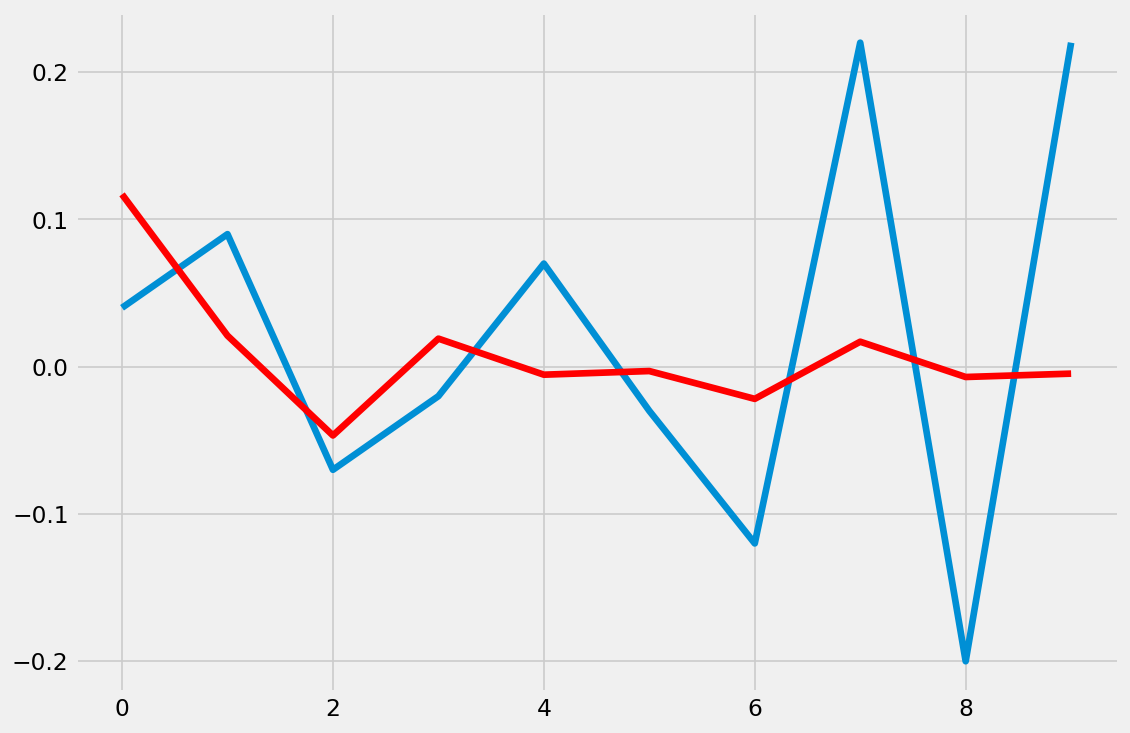

In [40]:
# fit model
from statsmodels.tsa.arima.model import ARIMA

# train ARMA
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

order = (0, 0, 12)          # order[1] = 0, because we don't use First order differencing
model = ARIMA(train, order=order)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [60]:
## Define the function that get the best result based on AIC metric.
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings('ignore')

def get_MA_model_results(data_length=None, train=None, test=None, q=3):
    order = (0, 0, q)          # order[1] = 0, because we don't use First order differencing
    model = ARIMA(train, order=order)
    model_results = model.fit()

    ## Results on testing set
    pred = model_results.predict(start=len(train), end=data_length-1, dynamic=False)
    evaluator = RegressionMetric(test, pred)
    res_test = evaluator.get_metrics_by_list_names(["RMSE", "MAE", "MAPE", "R2", "NSE", "KGE"])

    return res_test


list_q = list(range(2, 20))

for id_q, q in enumerate(list_q):
    res = get_MA_model_results(len(dataset), train, test, q)
    print(f"Q={q}, {res}")


Q=2, {'RMSE': 0.13175062417554814, 'MAE': 0.10943213120357805, 'MAPE': 1.031651333689406, 'R2': -0.033227795871816346, 'NSE': -0.033227795871816346, 'KGE': -0.2217799367092015}
Q=3, {'RMSE': 0.1330293880859791, 'MAE': 0.11092030471757068, 'MAPE': 1.088021194074796, 'R2': -0.05338202943631121, 'NSE': -0.05338202943631121, 'KGE': -0.11427330272386271}
Q=4, {'RMSE': 0.13230178610467797, 'MAE': 0.10835371333856485, 'MAPE': 1.0005654133954232, 'R2': -0.041890631338568074, 'NSE': -0.041890631338568074, 'KGE': -0.07963959765648254}
Q=5, {'RMSE': 0.13203144280465348, 'MAE': 0.10958412582660289, 'MAPE': 1.0422417947012725, 'R2': -0.037637017207051704, 'NSE': -0.037637017207051704, 'KGE': -0.13231729039982976}
Q=6, {'RMSE': 0.13214639721955954, 'MAE': 0.10937875787848861, 'MAPE': 1.019478752321277, 'R2': -0.03944466060176177, 'NSE': -0.03944466060176177, 'KGE': -0.12341364185124726}
Q=7, {'RMSE': 0.12904469176795336, 'MAE': 0.10433887963976787, 'MAPE': 0.9729376515788873, 'R2': 0.008777828959162

Coefficients: [-2.44504950e-05 -1.05860359e+00 -2.18046282e-01  1.51947259e-01
  1.77869428e-02  5.74707381e-02 -5.48173614e-03  1.08683379e-01
 -6.44247582e-02  2.11797893e-03  1.09405543e-02  5.69185493e-02
 -5.00829752e-02  7.49212645e-02]
predicted=0.117008, expected=0.040000
predicted=0.021087, expected=0.090000
predicted=-0.046703, expected=-0.070000
predicted=0.019059, expected=-0.020000
predicted=-0.005432, expected=0.070000
predicted=-0.002957, expected=-0.030000
predicted=-0.021848, expected=-0.120000
predicted=0.016963, expected=0.220000
predicted=-0.006995, expected=-0.200000
predicted=-0.004712, expected=0.220000
Test RMSE: 0.126


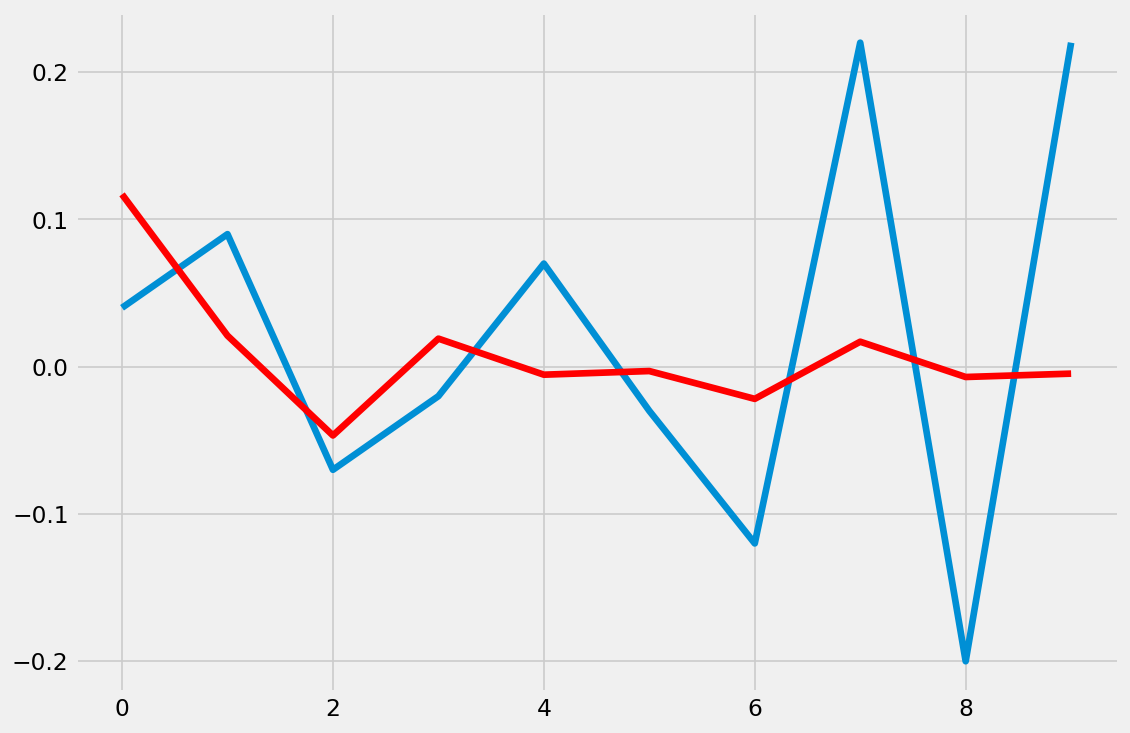

In [61]:
# create and evaluate a MA
from statsmodels.tsa.arima.model import ARIMA

df = get_df()
ts_diff = np.diff(df['Hydrometry_Nave_di_Rosano'].fillna(df['Hydrometry_Nave_di_Rosano'].mean()))
df['Hydrometry_Nave_di_Rosano'] = np.append([0], ts_diff)
df['Hydrometry_Nave_di_Rosano_diff1'] = df['Hydrometry_Nave_di_Rosano'].diff(1).fillna(df['Hydrometry_Nave_di_Rosano'].mean())
dataset = df['Hydrometry_Nave_di_Rosano_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# train MA
model = ARIMA(train, order=(0, 0, 12))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## ARMA model

- Các mô hình autoregressive–moving-average (ARMA) cung cấp mô tả súc tích cho một quá trình ngẫu nhiên (weakly stationary) bằng hai đa thức, một cho autoregression và một cho moving average. Đây là sự kết hợp của các mô hình AR và MA.


### ARMA(1,1) model
### R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ϵ<sub>t</sub> + θϵ<sub>t-1</sub>

- Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

Coefficients: [-1.60678291e-05 -1.26074263e+00 -8.32660666e-01  1.72055942e-01
 -7.32412610e-01 -1.00661462e+00  1.64949355e-01  3.27649421e-01
  1.11482122e-01  8.25896452e-02]
predicted=0.137785, expected=0.040000
predicted=0.000315, expected=0.090000
predicted=-0.029607, expected=-0.070000
predicted=-0.024245, expected=-0.020000
predicted=0.006135, expected=0.070000
predicted=0.000134, expected=-0.030000
predicted=-0.005327, expected=-0.120000
predicted=0.006555, expected=0.220000
predicted=-0.003878, expected=-0.200000
predicted=-0.000619, expected=0.220000
Test RMSE: 0.130


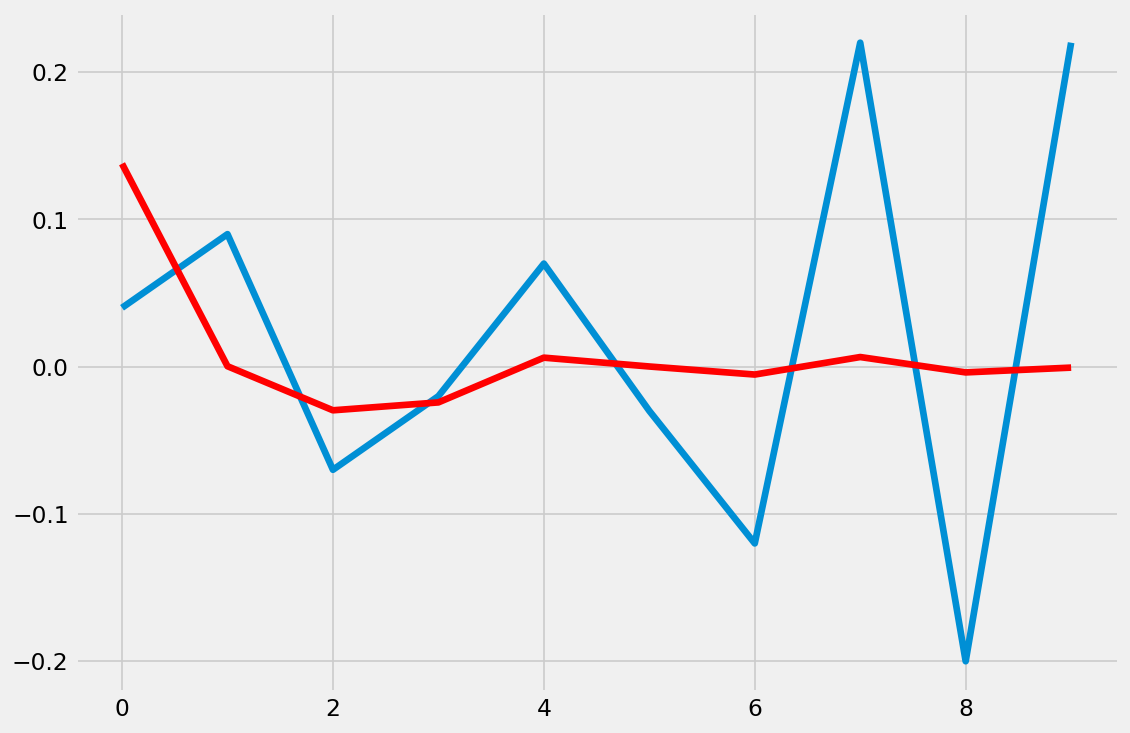

In [62]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima.model import ARIMA

df = get_df()
ts_diff = np.diff(df['Hydrometry_Nave_di_Rosano'].fillna(df['Hydrometry_Nave_di_Rosano'].mean()))
df['Hydrometry_Nave_di_Rosano'] = np.append([0], ts_diff)
df['Hydrometry_Nave_di_Rosano_diff1'] = df['Hydrometry_Nave_di_Rosano'].diff(1).fillna(df['Hydrometry_Nave_di_Rosano'].mean())
dataset = df['Hydrometry_Nave_di_Rosano_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# fit model
model = ARIMA(train, order=(2, 0, 6))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## ARIMA model

Coefficients: [-5.30037044e-06 -1.58101782e+00 -1.46270648e+00 -8.14351066e-01
  5.60184895e-01 -2.14552156e-01 -6.63928294e-01 -7.44500065e-01
  7.34976114e-02  8.17421650e-02]
predicted=0.094156, expected=0.040000
predicted=0.030418, expected=0.090000
predicted=-0.073927, expected=-0.070000
predicted=0.040762, expected=-0.020000
predicted=0.013452, expected=0.070000
predicted=-0.020714, expected=-0.030000
predicted=-0.020147, expected=-0.120000
predicted=0.051172, expected=0.220000
predicted=-0.034591, expected=-0.200000
predicted=-0.003779, expected=0.220000
ARIMA(3,0,5) --> AIC=2941.9938411424546; BIC=3012.1212684187517
Test RMSE: 0.114


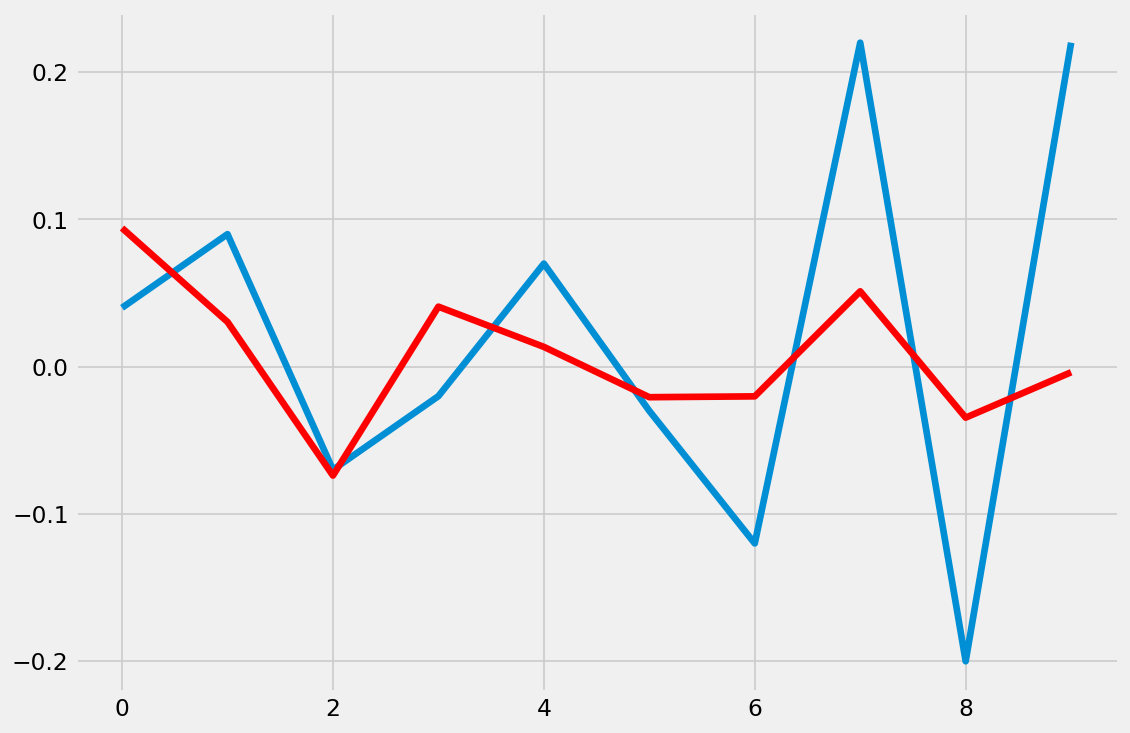

In [63]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima.model import ARIMA

df = get_df()
ts_diff = np.diff(df['Hydrometry_Nave_di_Rosano'].fillna(df['Hydrometry_Nave_di_Rosano'].mean()))
df['Hydrometry_Nave_di_Rosano'] = np.append([0], ts_diff)
df['Hydrometry_Nave_di_Rosano_diff1'] = df['Hydrometry_Nave_di_Rosano'].diff(1).fillna(df['Hydrometry_Nave_di_Rosano'].mean())
dataset = df['Hydrometry_Nave_di_Rosano_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]
order = (3, 0, 5)

# fit model
model = ARIMA(train, order=order)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))


model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
print('{} --> AIC={}; BIC={}'.format(model_name, model_fit.aic, model_fit.bic))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


[<statsmodels.tsa.arima.model.ARIMA object at 0x17f9df1c0>, (3, 0, 5), 2941.9938411424546, 3012.1212684187517]
[<statsmodels.tsa.arima.model.ARIMA object at 0x17fa68c40>, (2, 0, 4), 3025.9628541024686, 3082.064795923506]
[<statsmodels.tsa.arima.model.ARIMA object at 0x17fa68490>, (1, 0, 5), 2422.893329255191, 2478.9952710762286]
[<statsmodels.tsa.arima.model.ARIMA object at 0x17fa68cd0>, (2, 0, 3), 2956.8129371772407, 3005.9021362706485]
2422.893329255191 2478.9952710762286 [-2.17731059e-06 -9.53328267e-01 -1.38251639e-01 -1.25219015e+00
 -9.08590934e-02  2.92221473e-01  1.97392813e-01  7.79628627e-02]
{'R2': 0.02360109765728824, 'MAPE': 1.030089329148319, 'RMSE': 0.12807615531143013}


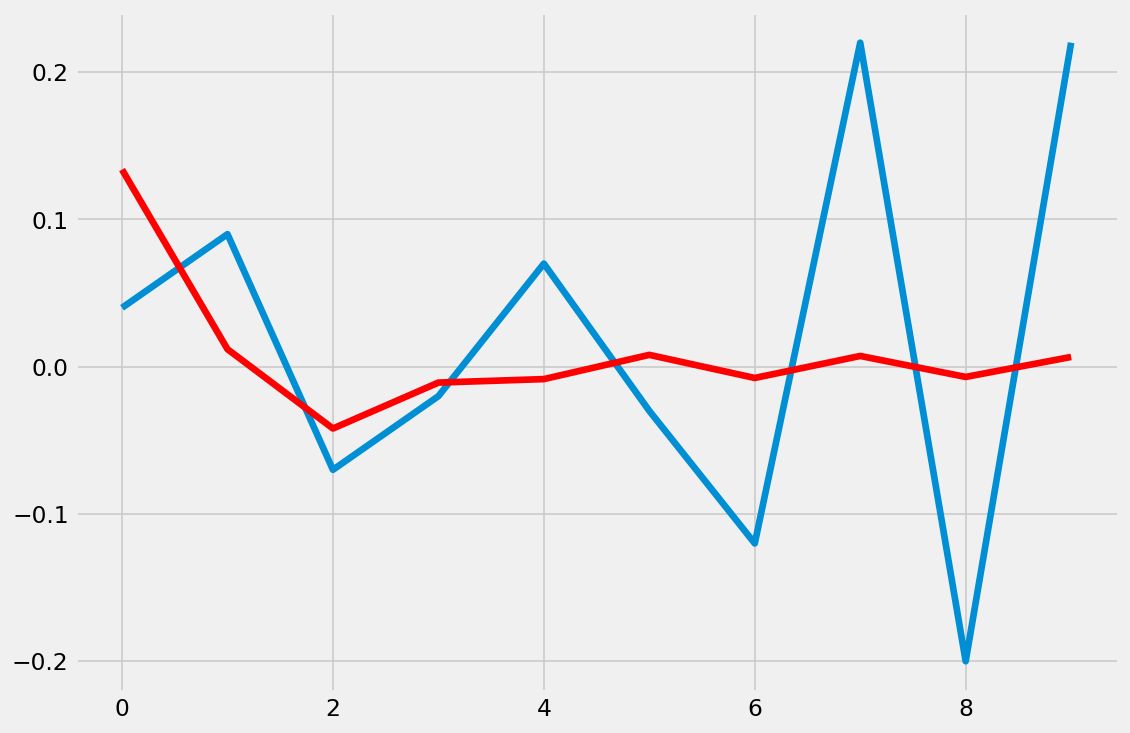

In [64]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima.model import ARIMA
from permetrics import RegressionMetric
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import numpy as np

def get_metrics(y_true, y_pred):
    evaluator = RegressionMetric(y_true, y_pred)
    return evaluator.get_metrics_by_list_names(["R2", "MAPE", "RMSE"])

def get_best_model(list_orders, data):
    dict_models = {}
    for idx, order in enumerate(list_orders):
        model = ARIMA(data, order=order)
        model_fit = model.fit()
        dict_models[idx] = [model, order, model_fit.aic, model_fit.bic, model_fit]
        print([model, order, model_fit.aic, model_fit.bic])
    list_models = sorted(dict_models.values(), key=lambda x: x[2])
    return list_models[0]

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['Hydrometry_Nave_di_Rosano'].fillna(df['Hydrometry_Nave_di_Rosano'].mean()))
df['Hydrometry_Nave_di_Rosano'] = np.append([0], ts_diff)
df['Hydrometry_Nave_di_Rosano_diff1'] = df['Hydrometry_Nave_di_Rosano'].diff(1).fillna(df['Hydrometry_Nave_di_Rosano'].mean())
dataset = df['Hydrometry_Nave_di_Rosano_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# fit model
list_orders = [(3, 0, 5), (2, 0, 4), (1, 0, 5), (2, 0, 3)]
model = get_best_model(list_orders, train)
print(model[4].aic, model[4].bic, model[4].params)

# make predictions
y_pred = model[4].predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
print(get_metrics(test, y_pred))

# plot results
plt.plot(test)
plt.plot(y_pred, color='red')
plt.show()

2645.196187741369 2694.284533852384 [-0.99893249 -1.09790501 -1.16302489  1.36263795  0.16305144 -0.26475208
  0.08052804]
{'R2': -0.14684584298265513, 'MAPE': 1.078351044909938, 'RMSE': 0.13880565608831877}


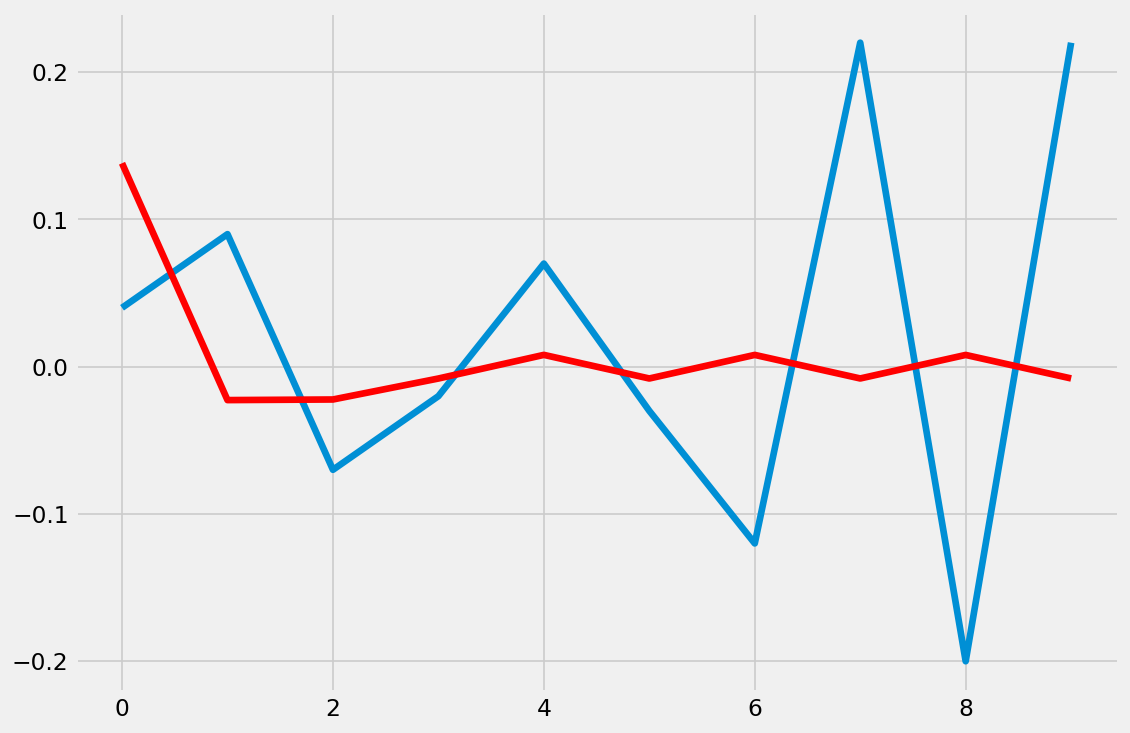

In [65]:
import numpy as np
from permetrics import RegressionMetric
from statsmodels.tsa.arima.model import ARIMA

def get_metrics(y_true, y_pred):
    evaluator = RegressionMetric(y_true, y_pred)
    return evaluator.get_metrics_by_list_names(["R2", "MAPE", "RMSE"])

def get_best_model(list_orders, data):
    dict_models = {}
    for idx, order in enumerate(list_orders):
        model = ARIMA(data, order=order)
        model_fit = model.fit()
        dict_models[idx] = [model, order, model_fit, model_fit.bic]
    list_models = sorted(dict_models.values(), key=lambda x: x[3])
    return list_models[0]

# First Order Differencing
df = get_df()
ts_diff = np.diff(df['Hydrometry_Nave_di_Rosano'].fillna(df['Hydrometry_Nave_di_Rosano'].mean()))
df['Hydrometry_Nave_di_Rosano'] = np.append([0], ts_diff)
df['Hydrometry_Nave_di_Rosano_diff1'] = df['Hydrometry_Nave_di_Rosano'].diff(1).fillna(df['Hydrometry_Nave_di_Rosano'].mean())
dataset = df['Hydrometry_Nave_di_Rosano_diff1'].values
size_dataset = len(dataset)
train, test = dataset[:size_dataset-10], dataset[size_dataset-10:]

# fit model
list_orders = [(3, 1, 5), (2, 1, 4), (1, 1, 5), (2, 1, 3)]
model = get_best_model(list_orders, train)
print(model[2].aic, model[2].bic, model[2].params)

# make predictions
y_pred = model[2].predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
print(get_metrics(test, y_pred))

# plot results
plt.plot(test)
plt.plot(y_pred, color='red')
plt.show()

In [66]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8207
Model:                 ARIMA(3, 0, 5)   Log Likelihood               -1460.997
Date:                Sun, 26 May 2024   AIC                           2941.994
Time:                        01:34:10   BIC                           3012.121
Sample:                             0   HQIC                          2965.967
                               - 8207                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -5.3e-06    1.8e-05     -0.295      0.768   -4.05e-05    2.99e-05
ar.L1         -1.5810      0.019    -83.790      0.000      -1.618      -1.544
ar.L2         -1.4627      0.028    -52.377      0.000      -1.517      -1.408
ar.L3         -0.8144      0.018    -44.325      0.000      -0.850      -0.778
ma.L1          0.5602      0.019     29.220      0.000       0.523       0.598
ma.L2         -0.2146      0.020    -10.863      0.000      -0.253      -0.176
ma.L3         -0.6639      0.023    -28.735      0.000      -0.709      -0.619
ma.L4         -0.7445      0.022    -34.145      0.000      -0.787      -0.702
ma.L5          0.0735      0.007     10.016      0.000       0.059       0.088
sigma2         0.0817      0.000    212.114      0.000       0.081       0.082
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):            461359.53
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                             2.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""